In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
from vae import VAE

import torch
from torchvision.datasets import CIFAR10
import torchvision.transforms as T
import matplotlib.pyplot as plt

In [51]:
!tree lightning_logs

lightning_logs
├── version_0
│   ├── checkpoints
│   │   └── epoch=19.ckpt
│   ├── events.out.tfevents.1598549291.beast.29637.0
│   └── hparams.yaml
├── version_1
│   ├── checkpoints
│   │   └── epoch=48.ckpt
│   ├── events.out.tfevents.1598549998.beast.30509.0
│   └── hparams.yaml
├── version_2
│   ├── checkpoints
│   ├── events.out.tfevents.1598550443.beast.32760.0
│   └── hparams.yaml
└── version_3
    ├── checkpoints
    │   └── epoch=15.ckpt
    ├── events.out.tfevents.1598550476.beast.405.0
    └── hparams.yaml

8 directories, 11 files


In [73]:
vae = VAE.load_from_checkpoint("lightning_logs/version_3/checkpoints/epoch=44.ckpt")
vae.eval();

In [74]:
ds = CIFAR10("data", train=False, transform=T.ToTensor())

In [75]:
example = 6

In [76]:
img = ds[example][0]
with torch.no_grad():
    mu = vae.encode(img.unsqueeze(0))[0]
    reconst = vae.decode(mu).squeeze()

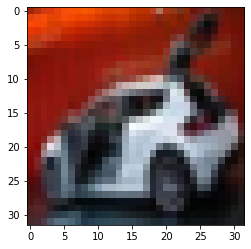

In [77]:
plt.imshow(img.permute(1, 2, 0).numpy())

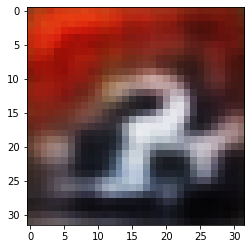

In [78]:
plt.imshow(reconst.permute(1, 2, 0).numpy())